<a href="https://colab.research.google.com/github/VeeraboinaSaiGanesh/Machine_Learning_DBSCAN/blob/main/ML_DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Estimated clusters = 2
Estimated noise points = 0


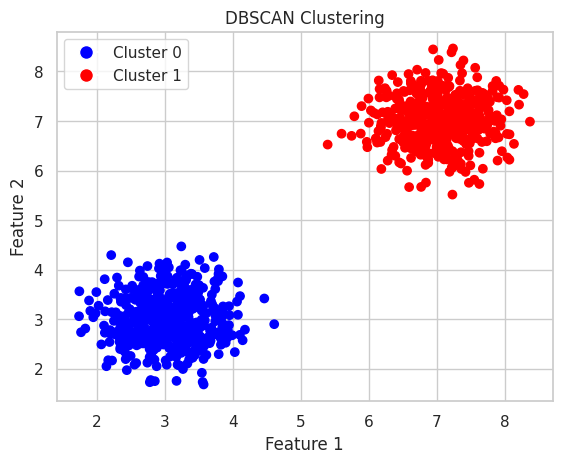

In [4]:
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
# Generating synthetic data
num_sample_total = 1000
cluster_centers = [(3, 3), (7, 7)]
num_classes = len(cluster_centers)
epsilon = 1.0
min_samples = 13

x, y = make_blobs(n_samples=num_sample_total, centers=cluster_centers, n_features=num_classes, center_box=(0, 1), cluster_std=0.5)
np.save('./cluster.npy', x)
x = np.load('./cluster.npy')

# Applying DBSCAN clustering
db = DBSCAN(eps=epsilon, min_samples=min_samples).fit(x)
labels = db.labels_
no_clusters = len(np.unique(labels))
no_noise = np.sum(np.array(labels) == -1, axis=0)

print("Estimated clusters = %d" % no_clusters)
print("Estimated noise points = %d" % no_noise)

# Plotting the clusters
colors = ['blue' if label == 1 else 'red' for label in labels]
plt.scatter(x[:, 0], x[:, 1], c=colors, marker='o', picker='True')

# Creating legends for the clusters
unique_labels = np.unique(labels)
legend_labels = ['Cluster {}'.format(i) for i in range(len(unique_labels))]
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=label)
                    for color, label in zip(['blue', 'red'], legend_labels)])

plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
